(0.0, 7.0, 0.0, 15.0)

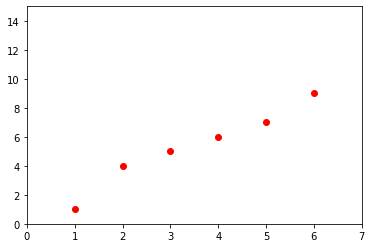

In [6]:
#Linear Regression Test....


import matplotlib.pyplot as plt
import numpy as np
x=[1,2,3,4,5,6]
y=[1,4,5,6,7,9]
plt.plot(x,y,'ro')
plt.axis([0,7,0,15])


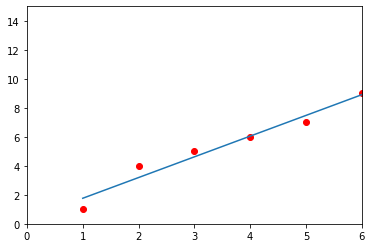

In [7]:
plt.plot(x,y,'ro')
plt.axis([0,6,0,15])

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [17]:
from __future__ import absolute_import ,division,print_function,unicode_literals
from IPython.display import clear_output
from six.moves import urllib
import pandas as pd
#feature column is required with Linear Regression..
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [33]:
#Insert Dataset
dftrain=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')#Data for Training
dfeval=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')#Data for Testing
print(dftrain.head())
y_train=dftrain.pop('survived')
y_eval=dfeval.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [34]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [39]:
print(dftrain.loc[0],y_train.loc[0])

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [40]:
dftrain['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64

In [41]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [43]:
dftrain.shape

(627, 9)

<AxesSubplot:>

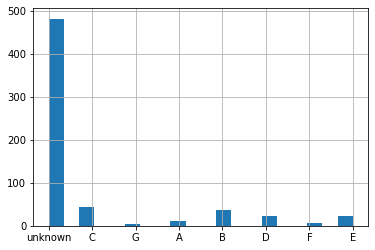

In [49]:
dftrain.deck.hist(bins=20)

<AxesSubplot:>

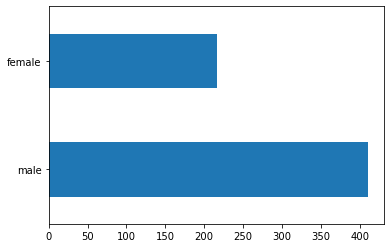

In [46]:
dftrain.sex.value_counts().plot(kind='barh')

In [51]:
dfeval.shape

(264, 9)

In [56]:
CATEGORICAL_Data=["sex",'n_siblings_spouses','parch',"class","deck","embark_town","alone"]
NUMERICAL_DATA=["age",'fare']
feature_columns=[]
for feature_name in CATEGORICAL_Data:
    vocab=dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocab))
for feature_name in NUMERICAL_DATA:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
    print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [57]:
dftrain['sex'].unique()

array(['male', 'female'], dtype=object)

In [73]:
def make_input_fn(data_df,label_df , num_epochs=10, shuffle=True , batch_size=32):
    def input_function():
        ds=tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds=ds.shuffle(1000)
        ds=ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_ip_f=make_input_fn(dftrain,y_train)
eval_ip_fn=make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False)



In [74]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)
clear_output()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/8_/gcgf9knn4rq0mnrs3tk7g7jw0000gn/T/tmp12oov_kq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [79]:
linear_est.train(train_ip_f)
result=linear_est.evaluate(eval_ip_fn)
clear_output()
print(result)

{'accuracy': 0.7765151, 'accuracy_baseline': 0.625, 'auc': 0.83088464, 'auc_precision_recall': 0.77683514, 'average_loss': 0.48219356, 'label/mean': 0.375, 'loss': 0.46963617, 'precision': 0.73255813, 'prediction/mean': 0.33865118, 'recall': 0.6363636, 'global_step': 1000}


In [95]:
result=list(linear_est.predict(eval_ip_fn))
print(dfeval.loc[7])
print(y_eval.loc[7])
print(result[7]['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/8_/gcgf9knn4rq0mnrs3tk7g7jw0000gn/T/tmp12oov_kq/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          21.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 7, dtype: object
0
[0.9073627  0.09263733]
